<a href="https://colab.research.google.com/github/MRazin172/CV_Lab5/blob/main/2348534_CV_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [36]:
def low_pass(img, cutoff):
    f = np.fft.fft2(img)
    f_shifted = np.fft.fftshift(f)

    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    mask = np.zeros((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) <= cutoff:
                mask[i, j] = 1

    f_shifted_filtered = f_shifted * mask

    f_filtered = np.fft.ifftshift(f_shifted_filtered)
    img_filtered = np.fft.ifft2(f_filtered)
    img_filtered = np.abs(img_filtered)

    return img_filtered


HERE, in low pase filtering we only allow the lower instensity pixels to go thru the filter. this maks the image blur. they remove the the fine details from the image while also preserving the generla shape of the img

In [37]:

def high_pass(img, cutoff):
    f = np.fft.fft2(img)
    f_shifted = np.fft.fftshift(f)

    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    mask = np.ones((rows, cols), np.uint8)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) <= cutoff:
                mask[i, j] = 0

    f_shifted_filtered = f_shifted * mask

    f_filtered = np.fft.ifftshift(f_shifted_filtered)
    img_filtered = np.fft.ifft2(f_filtered)
    img_filtered = np.abs(img_filtered)

    return img_filtered



here in high pass filter we only allow the high intensity pixels to go thru the filter. this makes the image look sharper.
ideal high pass filter removies the blurry lines and only projects the sharper lines.

edges and sharp transitions are preseved

In [38]:
img = cv2.imread('/content/avengers-endgame-iron-man-spiderman-uhdpaper.com-8K-118.jpg', cv2.IMREAD_GRAYSCALE)

In [39]:
cutoff = 50
img_filtered_low_pass = low_pass(img, cutoff)

In [42]:
cutoff = 50
img_filtered_high_pass = high_pass(img, cutoff)


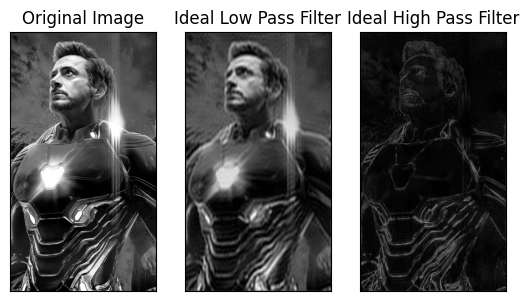

In [43]:
plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(img_filtered_low_pass, cmap='gray')
plt.title('Ideal Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(img_filtered_high_pass, cmap='gray')
plt.title('Ideal High Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()